# **Water Quality Prediction Project**

## **Objective** ##

The objective of this project is to develop a machine learning model to evaluate the potability of water based on various water quality metrics. Using a dataset containing information on 3276 different water bodies, we aim to create a predictive model that accurately classifies water as either potable or not potable. This model will utilize nine independent variables (pH, Hardness, Solids, Chloramines, Sulfate, Conductivity, Organic carbon, Trihalomethanes, Turbidity) to predict the dependent variable, Potability, which indicates if the water is safe for human consumption

## **Overview of the data** ##

- Description: Water quality metrics for 3276 different water bodies
- Independent Variables:
    - pH: pH value of water
    - Hardness: Capacity of water to precipitate soap in mg/L
    - Solids: Total dissolved solids in ppm
    - Chloramines: Amount of Chloramines in ppm
    - Sulfate: Amount of Sulfates dissolved in mg/L
    - Conductivity: Electrical conductivity of water in μS/cm
    - Organic_carbon: Amount of organic carbon in ppm
    - Trihalomethanes: Amount of Trihalomethanes in μg/L
    - Turbidity: Measure of light emittance in NTU
- Dependent Variable: Potability (1: Potable, 0: Not Potable)

## **Data** **Exploring**

In [543]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#%matplotlib inline

In [544]:
np.random.seed(42)

In [545]:
df=pd.read_excel("water_potability.xlsx")

In [546]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [547]:
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.177061,7.509306,NaN,327.459760,16.140368,78.698446,2.309149,1


In [548]:
df.shape

(3276, 10)

In [549]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [550]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [551]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## **Data preprocessing**

observation : The data doesn't need encoding as it is numerical data

### **1) Checking duplicates**

In [552]:
df.duplicated().sum()

0

### **2) Checking nulls**

In [553]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Checking the distribution of the columns that contains nulls to see if we will replace nulls with mean or median
note: we won't use the mode as all data is numerical

<Axes: ylabel='Count'>

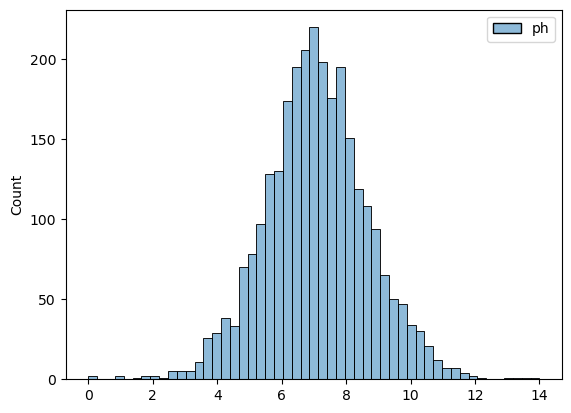

In [554]:
sns.histplot([df['ph']])

<Axes: ylabel='Count'>

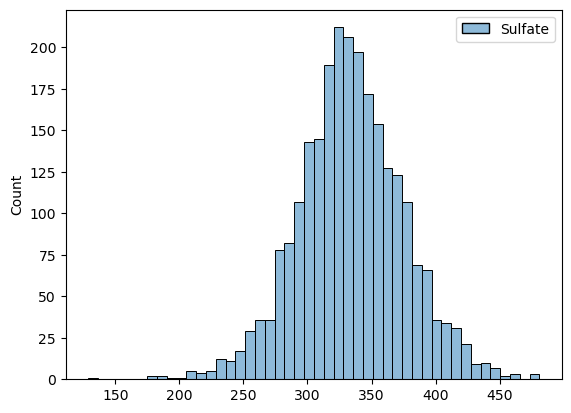

In [555]:
sns.histplot([df['Sulfate']])

<Axes: ylabel='Count'>

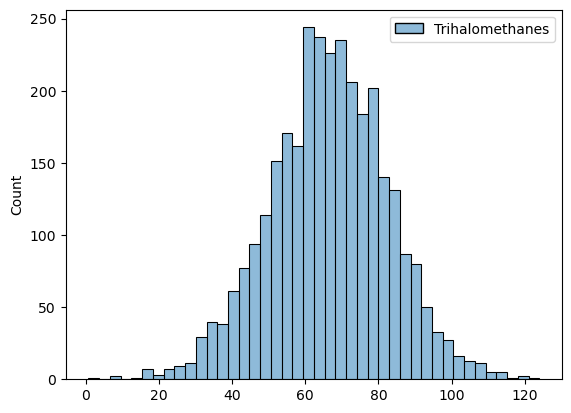

In [556]:
sns.histplot([df['Trihalomethanes']])

As the data is skewed we will replace it with median

In [557]:
for column in ['Trihalomethanes','Sulfate', 'ph']:
    df[column].fillna(df[column].median(), inplace=True)
#df.dropna(inplace=True)
# for column in ['Trihalomethanes','Sulfate', 'ph']:
#     df[column].fillna(df[column].mean(), inplace=True)

In [558]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [559]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.036752,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.073546,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.073546,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### **3) Checking outliers**

In [560]:
for col in df.columns:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in ph is : 142
The number of outliers in Hardness is : 83
The number of outliers in Solids is : 47
The number of outliers in Chloramines is : 61
The number of outliers in Sulfate is : 264
The number of outliers in Conductivity is : 11
The number of outliers in Organic_carbon is : 25
The number of outliers in Trihalomethanes is : 54
The number of outliers in Turbidity is : 19
The number of outliers in Potability is : 0


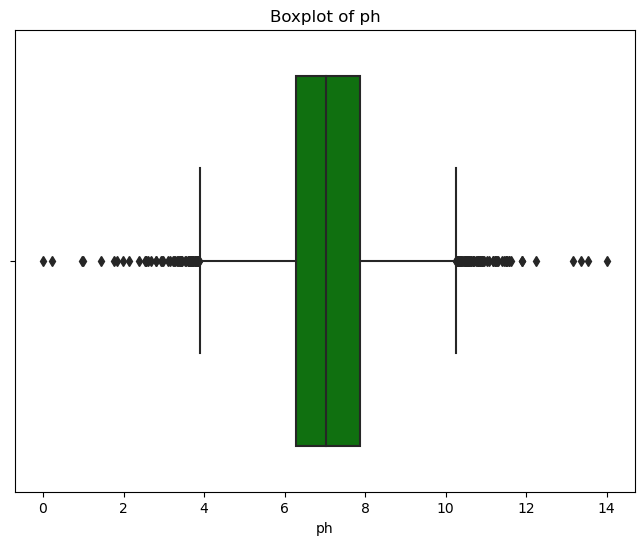

In [561]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["ph"],color='green')
plt.title('Boxplot of ph')
plt.show()

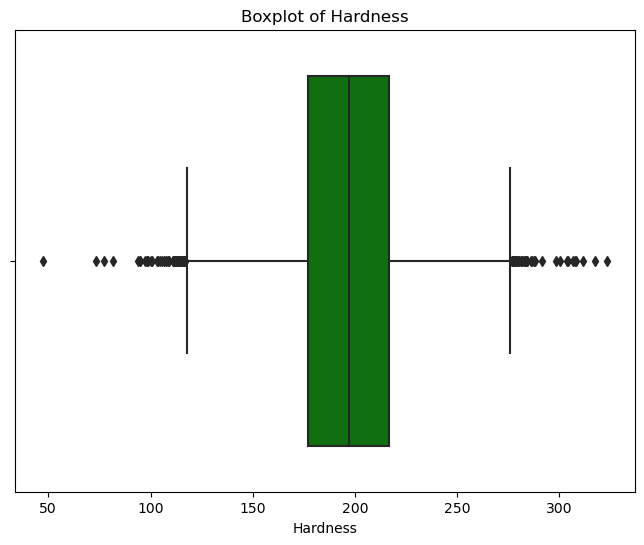

In [562]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Hardness"],color='green')
plt.title('Boxplot of Hardness')
plt.show()

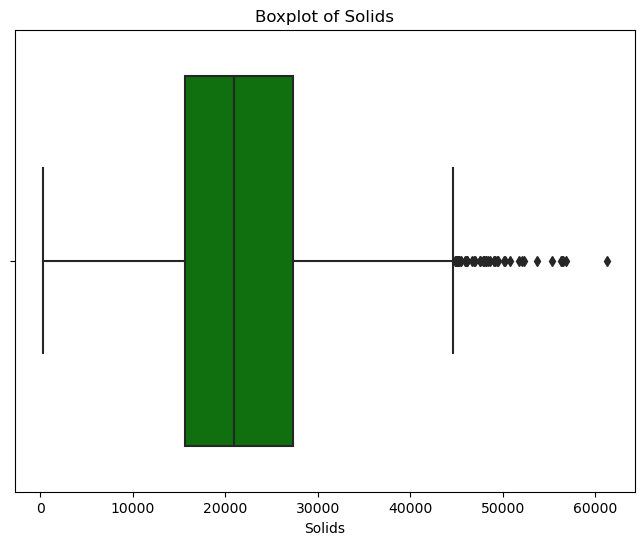

In [563]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Solids"],color='green')
plt.title('Boxplot of Solids')
plt.show()

In [564]:
cols=['ph', 'Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for col in cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  df[col] = np.where(df[col] < (q1 - norm_range), q1 - norm_range, df[col])
  df[col] = np.where(df[col] > (q3 + norm_range), q3 + norm_range, df[col])

In [565]:
cols=['ph', 'Hardness','Solids','Chloramines','Sulfate','Conductivity','Organic_carbon','Trihalomethanes','Turbidity']
for col in cols:
  q1 = np.percentile(df[col], 25)
  q3 = np.percentile(df[col], 75)
  norm_range = (q3 - q1) * 1.5
  lower_outliers = df[df[col] < (q1 - norm_range)]
  upper_outliers = df[df[col] > (q3 + norm_range)]
  outliers = len(lower_outliers)+len(upper_outliers)
  print(f"The number of outliers in {col} is : {outliers}")

The number of outliers in ph is : 0
The number of outliers in Hardness is : 0
The number of outliers in Solids is : 0
The number of outliers in Chloramines is : 0
The number of outliers in Sulfate is : 0
The number of outliers in Conductivity is : 0
The number of outliers in Organic_carbon is : 0
The number of outliers in Trihalomethanes is : 0
The number of outliers in Turbidity is : 0


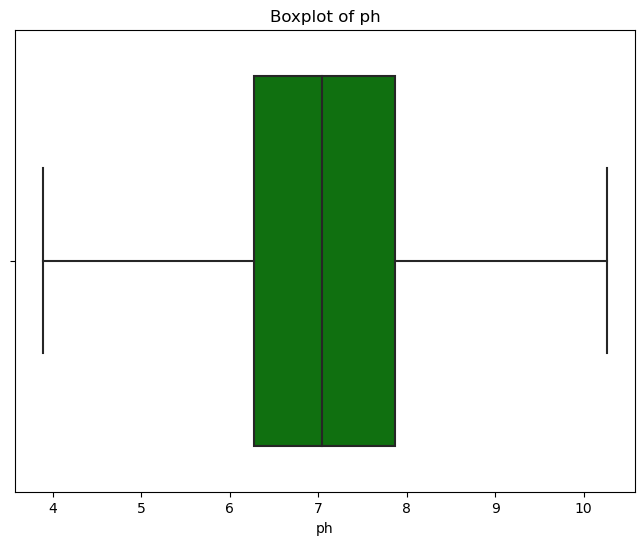

In [566]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["ph"],color='green')
plt.title('Boxplot of ph')
plt.show()

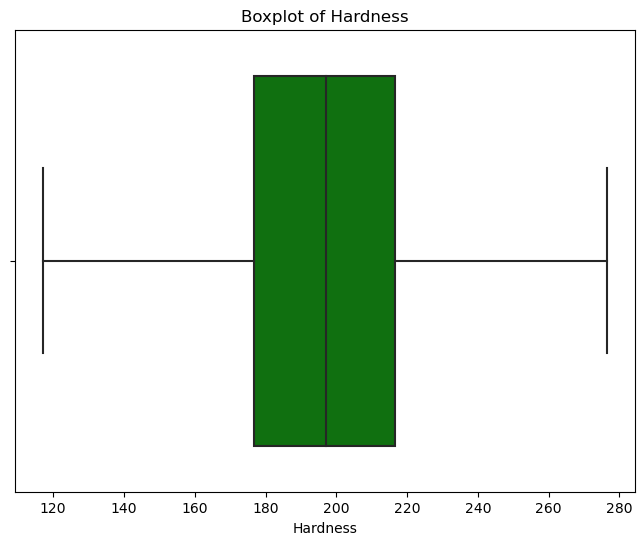

In [567]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Hardness"],color='green')
plt.title('Boxplot of Hardness')
plt.show()

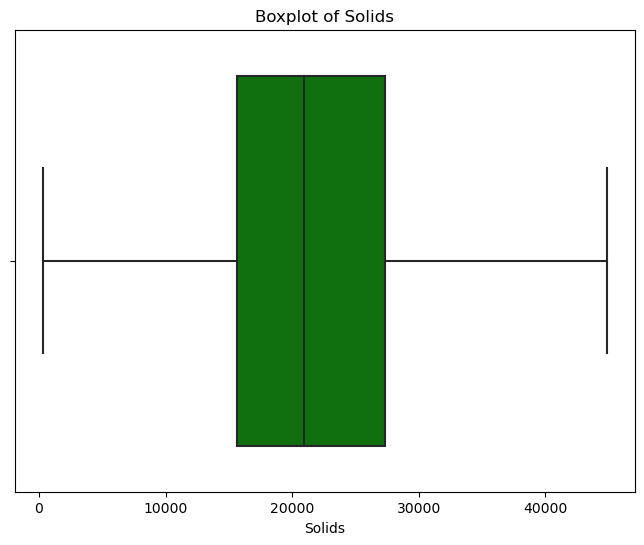

In [568]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df["Solids"],color='green')
plt.title('Boxplot of Solids')
plt.show()

## **Feature Engineering and Selection**

### **1) Correlation** ###

In [569]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.089394,-0.078025,-0.037922,0.018385,0.018636,0.036295,0.002519,-0.035727,-0.001683
Hardness,0.089394,1.000000,-0.048503,-0.026343,-0.076900,-0.025095,0.002458,-0.012780,-0.015588,-0.013360
Solids,-0.078025,-0.048503,1.000000,-0.070861,-0.142546,0.013177,0.011816,-0.011915,0.020995,0.031847
Chloramines,-0.037922,-0.026343,-0.070861,1.000000,0.026113,-0.021890,-0.013184,0.015368,0.001729,0.023523
Sulfate,0.018385,-0.076900,-0.142546,0.026113,1.000000,-0.009160,0.023376,-0.025674,-0.011458,-0.015506
Conductivity,0.018636,-0.025095,0.013177,-0.021890,-0.009160,1.000000,0.020859,0.000686,0.005856,-0.007881
Organic_carbon,0.036295,0.002458,0.011816,-0.013184,0.023376,0.020859,1.000000,-0.012687,-0.028089,-0.029282
Trihalomethanes,0.002519,-0.012780,-0.011915,0.015368,-0.025674,0.000686,-0.012687,1.000000,-0.022295,0.006818
Turbidity,-0.035727,-0.015588,0.020995,0.001729,-0.011458,0.005856,-0.028089,-0.022295,1.000000,0.001597
Potability,-0.001683,-0.013360,0.031847,0.023523,-0.015506,-0.007881,-0.029282,0.006818,0.001597,1.000000


<Axes: >

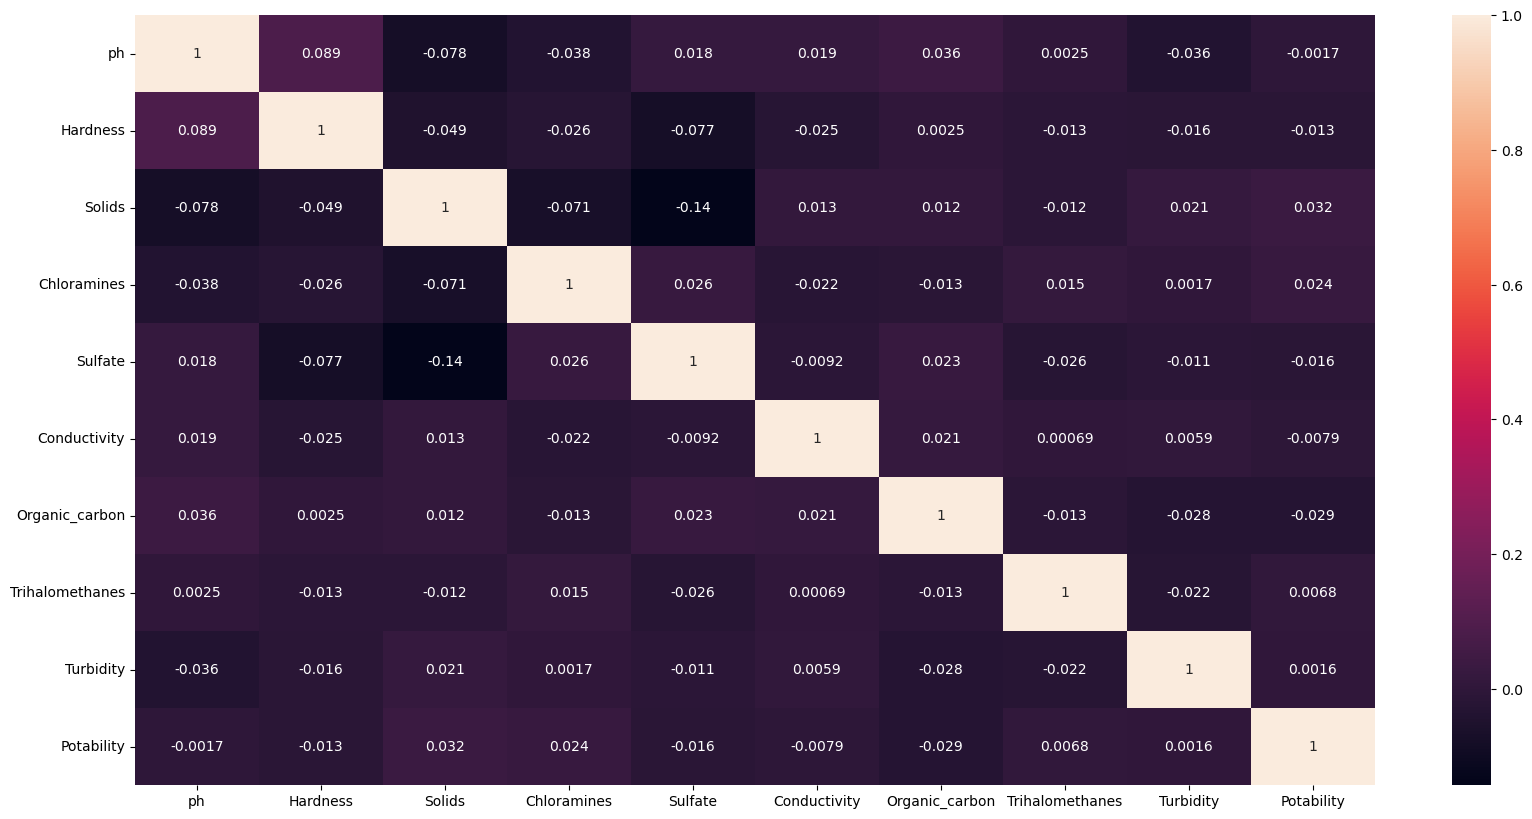

In [570]:
fig = plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(),annot = True)

In [571]:
for col in df.columns:
  relation = df['Potability'].corr(df[col])
  print(f"The corr between Potability and {col}={round(relation, 4)}")

The corr between Potability and ph=-0.0017
The corr between Potability and Hardness=-0.0134
The corr between Potability and Solids=0.0318
The corr between Potability and Chloramines=0.0235
The corr between Potability and Sulfate=-0.0155
The corr between Potability and Conductivity=-0.0079
The corr between Potability and Organic_carbon=-0.0293
The corr between Potability and Trihalomethanes=0.0068
The corr between Potability and Turbidity=0.0016
The corr between Potability and Potability=1.0


In [572]:
perfect_corr=[]
high_corr = []
low_corr = []
bad_corr = []
no_corr=[]
for col in df.columns:
  relation = df['Potability'].corr(df[col])
  if(relation > 0):
    if relation==1:
        perfect_corr.append(col)
    elif relation >= 0.7 and relation < 1 :
      high_corr.append(col)
    elif relation >= 0.4 and relation < 0.7 :
      low_corr.append(col)
    elif  relation > 0 and relation < 0.4 :
      bad_corr.append(col)
    else:
      no_corr.append(col)
  else:
    if relation==-1:
      perfect_corr.append(col)
    elif relation <= -0.7 and relation > -1 :
      high_corr.append(col)
    elif relation <= -0.4 and relation > -0.7 :
      low_corr.append(col)
    elif relation < 0 and relation > -0.4:
      bad_corr.append(col)
    else:
      no_corr.append(col)
print(f"the perfect corr are {perfect_corr}")
print(f"the high corr are {high_corr}")
print(f"the low corr are {low_corr}")
print(f"the bad corr are {bad_corr}")
print(f"the no corr are {no_corr}")

the perfect corr are ['Potability']
the high corr are []
the low corr are []
the bad corr are ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']
the no corr are []


### **2) Spliting data into features and target**

We dropped Turbidity as it has the lowest correlation 

In [573]:
x=df.drop(['Potability','Turbidity'], axis=1) #features
y=df['Potability'] #target

### **3) Balancing data**

**Checking if data is imabalanced**

In [574]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

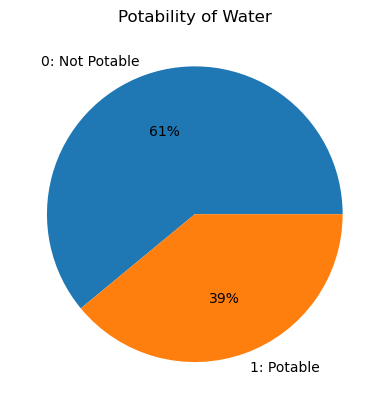

In [575]:
data_list = y.value_counts()
keys = ['0: Not Potable', '1: Potable']
plt.pie(data_list, labels=keys, autopct='%.0f%%')
plt.title('Potability of Water')
plt.show()

observation : the data is not balanced as the percentage of not poatable (0) values is greater than potable values(1)
so, we will use oversampling technique to make data balanced.

In [576]:
# from imblearn.over_sampling import RandomOverSampler
# over_samp=RandomOverSampler(sampling_strategy="not majority")
# x,y=over_samp.fit_resample(x,y)

In [577]:
y.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

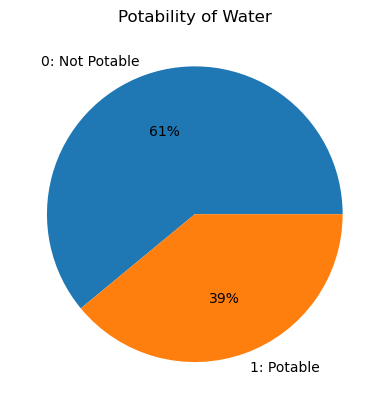

In [578]:
data_list = y.value_counts()
keys = ['0: Not Potable', '1: Potable']
plt.pie(data_list, labels=keys, autopct='%.0f%%')
plt.title('Potability of Water')
plt.show()

### **4) Spliting data into train and test**

**Splitting data 80% train and 20% test**

In [579]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### **5) Feature Scaling**

note: we have used standard scaler

In [580]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()
#minmax=MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Model Selection and Evaluation**

### **1) Logistic Regression**

#### **Grid Search**

In [581]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

lg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}


grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=10, scoring='accuracy')
grid_search.fit(x_train, y_train)


print("Best hyperparameters:", grid_search.best_params_)



Best hyperparameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


In [582]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(C=0.01,penalty='l2',solver='liblinear')

In [583]:
model1.fit(x_train, y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [584]:
# score of training
model1.score(x_train,y_train)

0.6053435114503817

In [585]:
y_pred1 = model1.predict(x_test)

Text(70.72222222222221, 0.5, 'Actual')

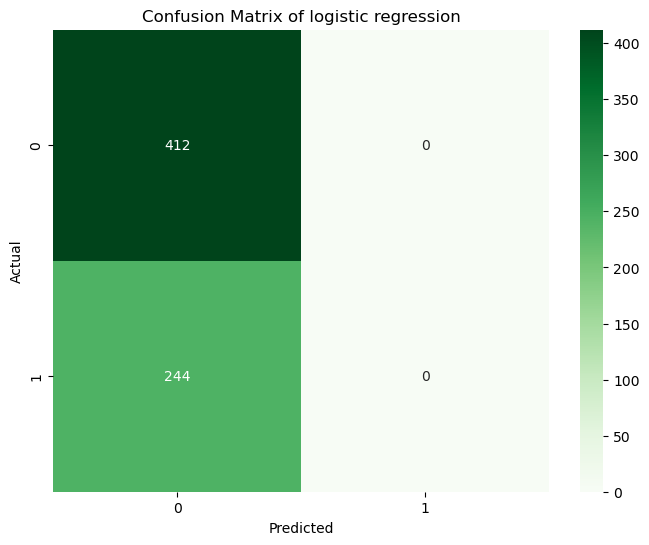

In [586]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix of logistic regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [587]:
from sklearn.metrics import classification_report
class_report = classification_report(y_test, y_pred1)
print(class_report)

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656



In [588]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test,y_pred1)}")

accuracy = 0.6280487804878049


### **2) Support Vector Machine (SVM)**

#### **Grid Search**

In [589]:
# from sklearn import svm
# from sklearn.model_selection import GridSearchCV

# # Define the SVM classifier
# svm_classifier = svm.SVC()

# # Define the parameter grid to search
# param_grid = {
#     'kernel': ['rbf', 'linear', 'poly']
# }

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)
# grid_search.fit(x_train, y_train)

# # Print the best parameters found
# print("Best Parameters:", grid_search.best_params_)

# # Evaluate the model with best parameters on test set
# best_model = grid_search.best_estimator_
# accuracy = best_model.score(x_test, y_test)
# print("Accuracy:", accuracy)


In [590]:
from sklearn import svm
model2=svm.SVC(kernel= 'rbf',random_state=42)

In [591]:
model2.fit(x_train,y_train)

SVC(random_state=42)

In [592]:
# score of training
model2.score(x_train,y_train)

0.7290076335877863

In [593]:
y_pred2=model2.predict(x_test)

Text(70.72222222222221, 0.5, 'Actual')

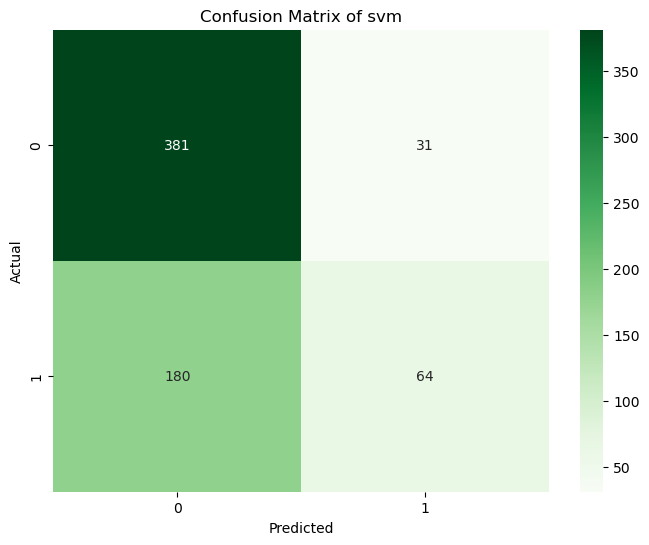

In [594]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix of svm')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [595]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test, y_pred2)
print(class_report)

              precision    recall  f1-score   support

           0       0.68      0.92      0.78       412
           1       0.67      0.26      0.38       244

    accuracy                           0.68       656
   macro avg       0.68      0.59      0.58       656
weighted avg       0.68      0.68      0.63       656



In [596]:
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_test,y_pred2)}")

Accuracy = 0.6783536585365854


### **3) Decision Tree**

#### **Grid Search**

In [597]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import GridSearchCV


# # Define the hyperparameters grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': [50,100,200,300]
# }

# # Instantiate the Decision Tree classifier
# dt_classifier = DecisionTreeClassifier()

# # Instantiate the GridSearchCV object
# grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy')

# # Fit the grid search to the data
# grid_search.fit(x, y)

# # Print the best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)


In [598]:
from sklearn.tree import DecisionTreeClassifier
l1=[]
l2=[]
m=[50,100,200,300]
for i in m:
  dt1=DecisionTreeClassifier(max_depth=i,criterion="entropy",random_state=42)
  dt1.fit(x_train,y_train)
  dt2=DecisionTreeClassifier(max_depth=i,criterion="gini",random_state=42)
  dt2.fit(x_train,y_train)
  l1.append(dt1.score(x_test, y_test))
  l2.append(dt2.score(x_test, y_test))

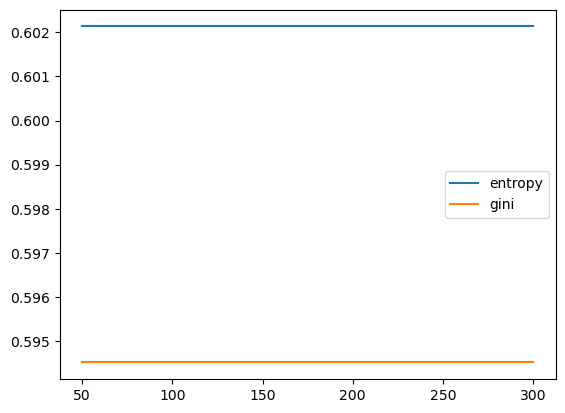

In [599]:
plt.plot(m,l1,label="entropy")
plt.plot(m,l2,label="gini")
plt.legend()

In [600]:
model3 = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state = 42)

In [601]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=42)

In [602]:
y_pred3=model3.predict(x_test)

Text(70.72222222222221, 0.5, 'Actual')

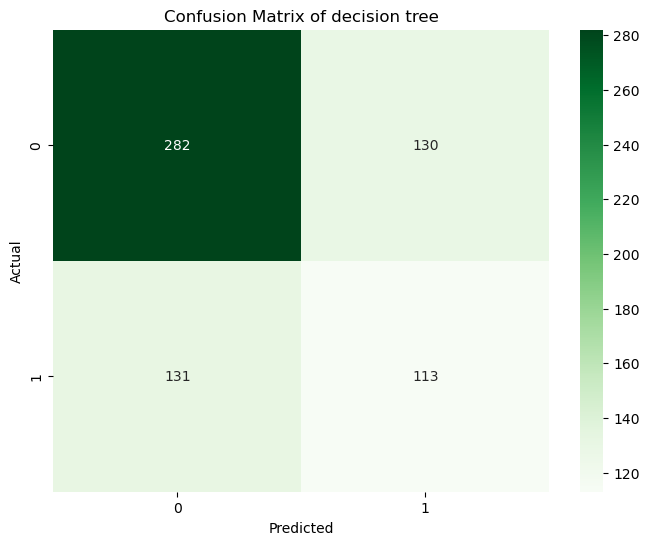

In [603]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix of decision tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [604]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test, y_pred3)
print(class_report)

              precision    recall  f1-score   support

           0       0.68      0.68      0.68       412
           1       0.47      0.46      0.46       244

    accuracy                           0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.60      0.60       656



In [605]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test,y_pred3)}")

accuracy = 0.6021341463414634


### **4) Random Forest**

#### **Grid Search**

In [606]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV


# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'criterion': ['gini', 'entropy'],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'bootstrap': [True, False],
#     'class_weight': [None, 'balanced']
# }


# rf_classifier = RandomForestClassifier()


# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')


# grid_search.fit(x, y)


# print("Best Parameters: ", grid_search.best_params_)
# print("Best Score: ", grid_search.best_score_)


In [607]:
from sklearn.ensemble import RandomForestClassifier

In [608]:
model4 = RandomForestClassifier(bootstrap=False, class_weight= 'balanced', criterion = 'gini',max_features='sqrt', n_estimators = 200)

In [609]:
model4.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       n_estimators=200)

In [610]:
y_pred4=model4.predict(x_test)

Text(70.72222222222221, 0.5, 'Actual')

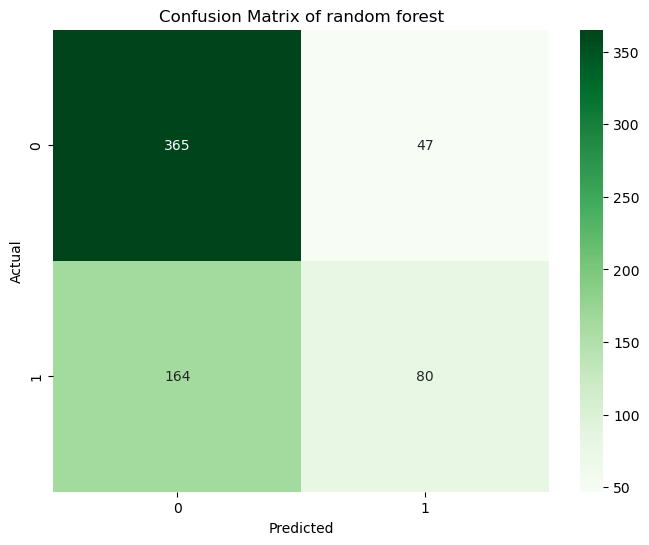

In [611]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix of random forest')







plt.xlabel('Predicted')
plt.ylabel('Actual')

In [612]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test, y_pred4)
print(class_report)

              precision    recall  f1-score   support

           0       0.69      0.89      0.78       412
           1       0.63      0.33      0.43       244

    accuracy                           0.68       656
   macro avg       0.66      0.61      0.60       656
weighted avg       0.67      0.68      0.65       656



In [613]:
from sklearn.metrics import accuracy_score
print(f"accuracy = {accuracy_score(y_test,y_pred4)}")

accuracy = 0.6783536585365854


### **5) XG boost**

In [614]:
from xgboost import XGBClassifier
model5 = XGBClassifier()

In [615]:
model5.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [616]:
y_pred5 = model5.predict(x_test)

Text(70.72222222222221, 0.5, 'Actual')

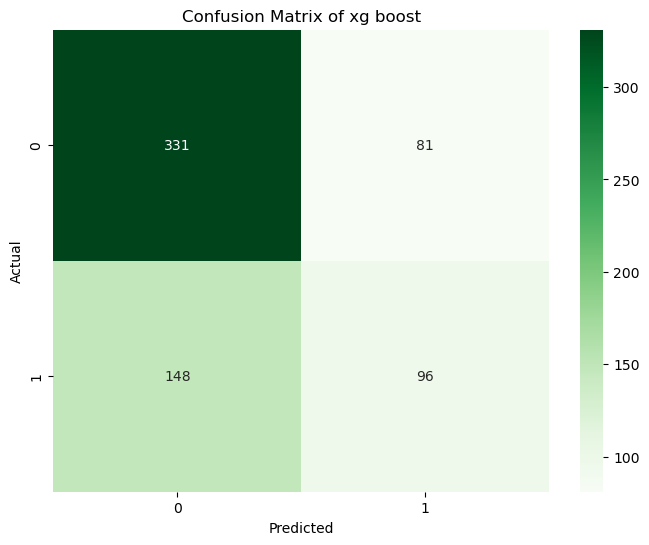

In [617]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred5)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True,fmt='d',cmap='Greens')
plt.title('Confusion Matrix of xg boost')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [618]:
from sklearn.metrics import classification_report
class_report=classification_report(y_test, y_pred5)
print(class_report)

              precision    recall  f1-score   support

           0       0.69      0.80      0.74       412
           1       0.54      0.39      0.46       244

    accuracy                           0.65       656
   macro avg       0.62      0.60      0.60       656
weighted avg       0.64      0.65      0.64       656



In [619]:
from sklearn.metrics import accuracy_score
print(f"Accuracy = {accuracy_score(y_test,y_pred5)}")

Accuracy = 0.6509146341463414


## **Accuracy table**

In [620]:
model_name={'Models':['logistic regression','SVM','Decision Tree','Random forest','XG boost'],'Accuracy':[metrics.accuracy_score(y_test,y_pred1),metrics.accuracy_score(y_test,y_pred2),metrics.accuracy_score(y_test,y_pred3),metrics.accuracy_score(y_test,y_pred4),metrics.accuracy_score(y_test,y_pred5)]}
model_name_df=pd.DataFrame(model_name)
model_name_df

,Models,Accuracy
0,logistic regression,0.628049
1,SVM,0.678354
2,Decision Tree,0.602134
3,Random forest,0.678354
4,XG boost,0.650915


<Axes: xlabel='Models', ylabel='Accuracy'>

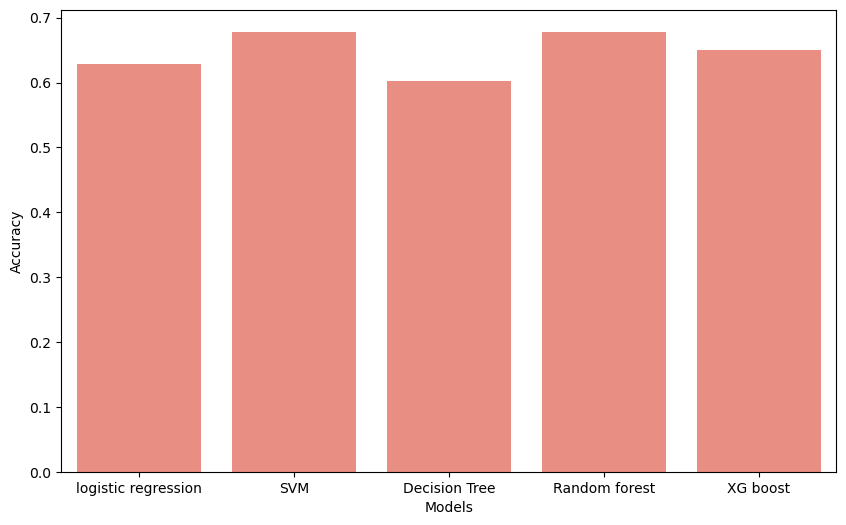

In [621]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Models',y='Accuracy',data=model_name_df,color='salmon')

## **Deployment**

In [622]:
testt=pd.read_excel('test_potable.xlsx') #log
model1.predict(testt)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [623]:
testt=pd.read_excel('test_potable.xlsx') #svm
model2.predict(testt)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [624]:
testt=pd.read_excel('test_potable.xlsx') #dt
model3.predict(testt)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [625]:
testt=pd.read_excel('test_potable.xlsx') #rf
testt=sc.transform(testt)
model4.predict(testt)

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [626]:
import joblib
joblib.dump(sc, 'scaler.pkl')

['scaler.pkl']

**Uploading models into file using joblib** 

In [627]:
import joblib
file='lr_model'
joblib.dump(model1,file)
model_deploy=joblib.load(open(file,'rb'))

In [628]:
import joblib
file='svm_model'
joblib.dump(model2,file)
model_deploy=joblib.load(open(file,'rb'))

In [629]:
import joblib
file='dt_model'
joblib.dump(model3,file)
model_deploy=joblib.load(open(file,'rb'))

In [630]:
import joblib
file='rf_model'
joblib.dump(model4,file)
model_deploy=joblib.load(open(file,'rb'))

In [631]:
import joblib
file='xg_model'
joblib.dump(model5,file)
model_deploy=joblib.load(open(file,'rb'))